In [1]:
import matplotlib as mpl
# mpl.use('Qt5Agg')
import sys; sys.path.insert(0, '../')
from geoplot import utils
import geoplot as gplt
from geoplot import crs as ccrs
import geopandas as gpd
import pandas as pd
import shapely
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

collisions = pd.read_csv("../data/nyc_collisions/NYPD_Motor_Vehicle_Collisions.csv", index_col=0)

def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return shapely.geometry.Point(0, 0)
    else:
        return shapely.geometry.Point(long, lat)

collisions = gpd.GeoDataFrame(collisions.head(5000), geometry=collisions.head(5000).apply(pointify, axis='columns'))
collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]
collisions = collisions[collisions['BOROUGH'].notnull()]

boroughs = gpd.read_file("../data/nyc_boroughs/boroughs.geojson", driver='GeoJSON')

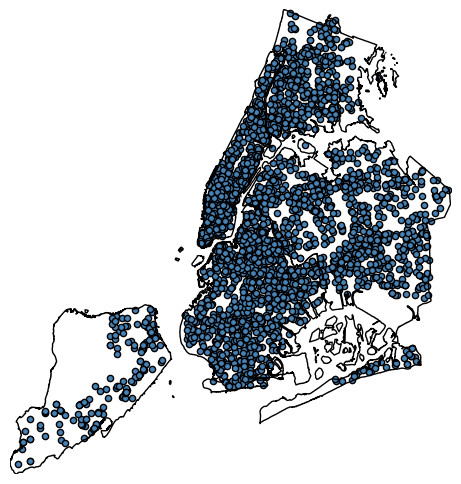

In [2]:
ax = gplt.polyplot(boroughs, projection=ccrs.AlbersEqualArea())
gplt.pointplot(collisions, projection=ccrs.AlbersEqualArea(), ax=ax)
plt.savefig('../figures/polyplot/polyplot-stacked.png')

In [ ]:
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_extent((-74.2589, -73.7004, 40.4774, 40.9176))

for geom in boroughs.geometry:
    features = ShapelyFeature([geom], ccrs.PlateCarree())
    ax.add_feature(features, facecolor='None')

points = collisions[collisions['BOROUGH'].notnull()]
xs = [p.x for p in points.geometry]
ys = [p.y for p in points.geometry]
ax.scatter(xs, ys, transform=ccrs.PlateCarree())

    
plt.savefig('../figures/polyplot/polyplot-test.png')

In [ ]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection=ccrs.AlbersEqualArea())
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
ax.scatter([0, 1], [1, 0], transform=ccrs.PlateCarree())
ax.scatter([0, 1], [1, 0], transform=ccrs.AlbersEqualArea())
plt.savefig("test.png")